In [42]:
# Initialize Otter
import otter
grader = otter.Notebook("lab01.ipynb")

---

<h1><center>SDSE Lab 1<br><br> Randomness and Monte Carlo simulation</center></h1>

---

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from resources.hashutils import *
from scipy.integrate import solve_ivp
import scipy.stats as stats

# Question 1: Area and perimeter of pumpkin seeds

Pumpkin seeds are a popular snack in many parts of the world. Two types of seeds that are grown in Turkey are called Ürgüp Sivrisi and Çerçevelik. We will refer to these respectively as types A and B. Researchers from Selcuk University have created a machine learning model to automatically classify type A and B seeds based on measurable attributes, such as their area, perimeter, major axis length, compactness, etc. [1]. Such a study begins with the arduous task of collecting and measuring a large number of seeds. In this lab activity we will load the data assembled by the researchers, compute its sample statistics (mean and standard deviations), and plot it in histograms.

The image below is from [1] and shows the two seed types.

<center><img src="resources/Core-type-of-pumpkin-seed-varieties.png" width=500></center>

[1] Koklu, Murat & Sarigil, Şeyma & Özbek, Osman. (2021). "The use of machine learning methods in classification of pumpkin seeds (Cucurbita pepo L.)". Genetic Resources and Crop Evolution. 68. 10.1007/s10722-021-01226-0. 

## Question 1.1: Load the dataset

The data is contained in two separate files: `A.csv` for Ürgüp Sivrisi seeds, and `B.csv` for Çerçevelik seeds. Each of these files has two columns of comma-separated data. Each row represents a particular seed. The two columns are its measured "major axis length" (column 0) and  "compactness" (column 1). The definitions of these two quantities are not important for the purposes of this lab. 

+ Use [`np.loadtxt`](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) to load the two data files into two NumPy arrays `A` and `B`. 
+ Create these variables:
    + `nA`: the number of seeds of type `A`. 
    + `major_axis_len_A`: column index 0 of `A`.
    + `compactness_A`: column index 1 of `A`.
    + `nB`: the number of seeds of type `B`.
    + `major_axis_len_B`: column index 0 of `B`.
    + `compactness_B`: column index 1 of `B`.

**Hints**: 
+ Below are the first 5 rows of `A.txt`. Notice the use of commas. Use the `delimiter` keyword to inform `np.loadtxt` that the column separator is a comma.

```text
483.5875,0.6471
629.723,0.6175
508.1608,0.6533
484.9191,0.6248
509.7207,0.6518
```

In [44]:
#  Ürgüp Sivrisi seeds
A = np.loadtxt('A.csv', delimiter=',')
nA = len(A)
major_axis_len_A = A[:, 0]
compactness_A = A[:, 1]

# Çerçevelik seeds
B = np.loadtxt('B.csv', delimiter=',')
nB = len(B)
major_axis_len_B = B[:, 0]
compactness_B = B[:, 1]

In [45]:
grader.check("q1p1")

q1p1 results: All test cases passed!

## Question 1.2: Sample mean and sample standard deviation

Recall from lecture the formulas for the sample mean $\hat\mu_x$ and sample standard deviation $\hat{s}_x$ of a sample $\{x_1,...,x_n\}$:
\begin{align*}
&\hat{\mu}_x = \frac{1}{n}\sum_{i=1}^{n} x_i \\ 
&\hat{s}_x = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n} (x_i-\hat{\mu}_x)^2}
\end{align*} 
Compute these quantities for both the major axis length and the compactness of both seed types. Save these to the following variable names.

| Variable | Description |
| --- | --- |
| `major_axis_len_A_mean` | mean of major axis length for type A seeds. |
| `major_axis_len_A_std` | standard deviation of major axis length for type A seeds. |
| `compactness_A_mean` | mean of compactness for type A seeds. |
| `compactness_A_std` | standard deviation of compactness for type A seeds. |
| `major_axis_len_B_mean` | mean of major axis length for type B seeds. |
| `major_axis_len_B_std` | standard deviation of major axis length for type B seeds. |
| `compactness_B_mean` | mean of compactness for type B seeds. |
| `compactness_B_std`  | standard deviation of compactness for type B seeds. |


**Hints**: 
+ [np.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)
+ [np.std](https://numpy.org/doc/stable/reference/generated/numpy.std.html): Notice that the parameter `ddof` must be set to 1 to get the correct denominator ($n-1$). 



In [46]:
major_axis_len_A_mean = np.mean(major_axis_len_A)
major_axis_len_A_std = np.std(major_axis_len_A, ddof=1)
compactness_A_mean = np.mean(compactness_A)
compactness_A_std = np.std(compactness_A, ddof=1)
major_axis_len_B_mean = np.mean(major_axis_len_B)
major_axis_len_B_std = np.std(major_axis_len_B, ddof=1)
compactness_B_mean = np.mean(compactness_B)
compactness_B_std = np.std(compactness_B, ddof=1)

In [47]:
grader.check("q1p2")

q1p2 results: All test cases passed!

## Question 1.3: Histograms

Create the pair of histograms shown below with the following characteristics:

+ `figsize=(10,4)`.
+ The figure has two subplots (`ncols=2`). Major axis length is on the left side, compactness is on the right side. 
+ Each subplot has two histograms: one for type A seeds (`color='dodgerblue'`), one for type B seeds (`color='crimson'`).
+ The histograms are created with [`ax.hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) and setting the transparency to 0.5 (`alpha=0.5`).
+ The vertical lines indicating the mean values are made with [`axvline`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html).
+ Add the legend and x-axis labels.

<center><img src="resources/hist.png" width=750></center>

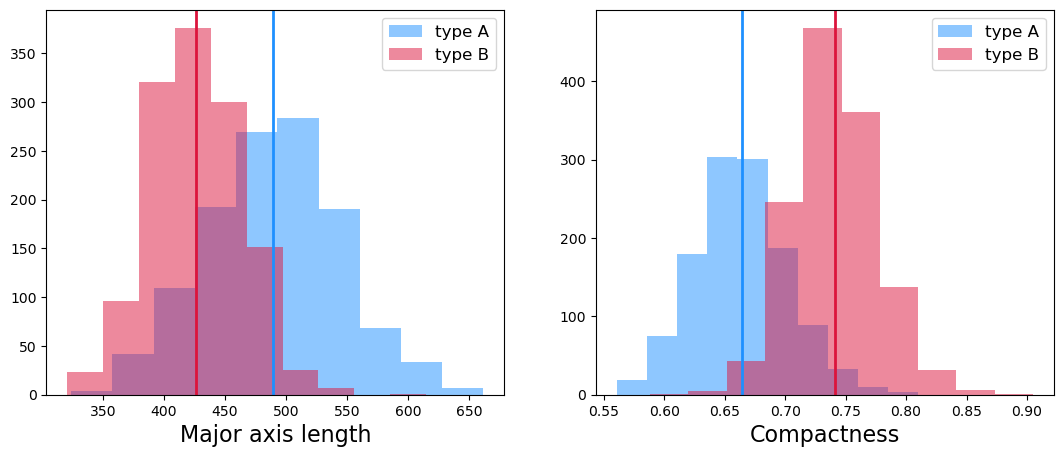

In [48]:
fig1, ax1 = plt.subplots(figsize=(13,5),ncols=2)

# left hand side plot
ax1[0].hist(major_axis_len_A, color='dodgerblue',alpha=0.5,label='type A')
ax1[0].axvline(major_axis_len_A_mean,color='dodgerblue',linewidth=2)
ax1[0].hist(major_axis_len_B, color='crimson',alpha=0.5,label='type B')
ax1[0].axvline(major_axis_len_B_mean,color='crimson',linewidth=2)
ax1[0].set_xlabel('Major axis length',fontsize=16)
ax1[0].legend(fontsize=12)

# repeat for the right-hand side plot
ax1[1].hist(compactness_A, color='dodgerblue',alpha=0.5,label='type A')
ax1[1].axvline(compactness_A_mean,color='dodgerblue',linewidth=2)
ax1[1].hist(compactness_B, color='crimson',alpha=0.5,label='type B')
ax1[1].axvline(compactness_B_mean,color='crimson',linewidth=2)
ax1[1].set_xlabel('Compactness',fontsize=16)
ax1[1].legend(fontsize=12) 

In [49]:
grader.check("q1p3")

q1p3 results: All test cases passed!

# Question 2: Monte Carlo simulation of a free throw in basketball


A [free throw](https://en.wikipedia.org/wiki/Free_throw) in basketball is a penalty shot awarded to a player who has been fouled. The player is allowed to throw the ball unopposed from behind the "free throw" line, which is about 14 horizontal feet from the basket. The goal is for the ball to go through the hoop (a.k.a. the basket), which is about 10 feet off the ground and 18 inches in diameter (see illustration below).

<center><img src="resources/freethrow.png" width=600></center>

Free throws are difficult to make. Professional players typically have around a 75\% success rate. Very good players may reach 90\%. Stephen Curry of the Golden State Warriors' career average is 91\%!

In this activity we will use physics and Monte Carlo simulation to get a sense of how variations in the throw affect whether the free throw is successful. We will use a *very* simplified model which ignores many details, such as the rotation of the ball, the backboard, and the interaction of the ball with the rim of the hoop.

**Dynamics of the ball in flight**

Our model considers the ball as a particle traveling in a two dimensional plane, subject to two forces: weight and aerodynamic drag. A free body diagram is shown below. The weight is the product of the ball's mass $m=0.6\;kg$ and the acceleration due to gravity $g=9.8\;m/s^2$. The drag force $F_d$ is:
\begin{equation*}
F_d = (1/2)\rho A C v^2
\end{equation*}
where $A$ is the cross-sectional area of the ball, $C$ is the drag coefficient, $\rho$ is the density of the air, and $v$ is the speed of the ball.
Values for these and other constants are defined in the next cell.

<center><img src="resources/ball.png" width=340></center>


In [50]:
# geometry of the free throw
ft2meter = 0.3048                   # feet to meters conversion factor
basket_x = 14*ft2meter              # x component of the position of the basket [m]
basket_y = 10*ft2meter              # y component of the position of the basket [m]
basket_diameter = 18/12*ft2meter    # diameter of the hoop [m]

# parameters of the drag force
d = 0.25                # diameter of the ball [m]
A = np.pi*(d**2)/4      # cross-sectional area of the ball [m^2]
C = 0.001               # drag coefficient [-]
rho = 1.2               # density of air [kg/m^3]

# parameters of the weight force
g = 9.8                 # gravitational acceleartion [m/s^2]
m = 0.6                 # mass of the ball [kg]

### State equation for the ball in flight

The ball leaves the player's hand at time $t=0$. The *state* of the ball at any time consists of four numbers: its position in $xy$ coordinates $(p_x, p_y)$, and its velocity in $xy$ coordinates $(v_x,v_y)$. We arrange these into a state vector $z$:
\begin{equation*}
z = (p_x,p_y,v_x,v_y)
\end{equation*}

Applying the standard rules of particle mechanics we then obtain a system of four ODEs describing the motion of the ball:
\begin{align*}
p'_x &= v_x \\
p'_y &= v_y \\
v'_x &= -K \:v\: v_x \\
v'_y &= -K \:v \: v_y - g 
\end{align*}
Here $v$ is the velocity of the ball  and $K$ is a constant:
\begin{align*}
&v = \sqrt{v_x^2+v_y^2} \\ 
&K = \frac{\rho A C}{2m}
\end{align*}

These formulas give a transformation from the state $z = (p_x,p_y,v_x,v_y)$ to its derivative $z' = (p'_x,p'_y,v'_x,v'_y)$. This transformation is implemented in the function `ball_flight_equation(t,z)` in the next cell. The function takes the current value of time `t` (not used) and the state `z`, and it returns the derivatives `pxprime, pyprime, vxprime, vyprime`.

In [51]:
def ball_flight_equation(t,z):

    # unpack z into variables px, py, vx, vy
    px, py, vx, vy = z

    # define the velocity v in terms of vx and vy
    v = np.sqrt( vx**2 + vy**2 )
    
    # define the constant K
    K = rho*A*C/2/m

    # state equation
    pxprime = vx
    pyprime = vy
    vxprime = -K*v*vx
    vyprime = -K*v*vy-g

    # return the derivatives in the correct order
    return pxprime, pyprime, vxprime, vyprime

### Initial state of the ball

The initial time ($t=0$) for the system of ODEs described above is the instant when the ball leaves the player's hand. That is the last moment at which the player can affect the trajectory of the ball. The initial state consists of the $xy$ coordinates of the initial position and velocity:
\begin{equation*}
z(0) = (p_x(0),p_y(0),v_x(0),v_y(0))
\end{equation*}
The initial velocities are computed from an initial angle $\theta_0$ and speed $v_0$:
\begin{align*}
v_x(0) &= v_0 \cos(\theta_0) \\
v_y(0) &= v_0 \sin(\theta_0)
\end{align*}


This computation is demonstrated in the next cell for an initial position $p_x(0)=0$ and $p_y(0)=6.5$ feet, an initial velocity of velocity $v_0=7.4\:m/s$, and an initial angle of $\theta_0=55^o$. These are packed into a tuple called `z_test_ic`, where `z_test_ic=(px0,py0,vx0,vy0)`.

**Note:**
+ All distances velocities are in SI units. The global constant `ft2meter` is used to convert distances from feet to meters. `np.deg2rad` is used to convert from degrees to radians.

In [52]:
px0 = 0
py0 = 6.5*ft2meter
theta0 = np.deg2rad(55)
v0 = 7.4
vx0 = v0*np.cos(theta0)
vy0 = v0*np.sin(theta0)
z_test_ic=(px0,py0,vx0,vy0)

### Trajectory of the ball

With the initial condition and state equations defined, we can now use an ODE solver to compute the trajectory of the ball. We will use SciPy's [`solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) for this. Note the following.

+ The trajectory of the ball is computed over the time period from zero to 2 seconds. 
+ The `t_eval` argument of `solve_ivp` is used to evaluate the solution on a uniform grid with 100 intervals (i.e. `np.linspace(0,2,100)`).
+ The return value of `solve_ivp`, which we've called `sol`, contains the state trajectory as `sol.y`. `sol.y` is a 2D NumPy array with shape `(4,100)` where 4 is the number of states `(px,py,vx,vy)` and 100 is the number of time steps. Hence, the trajectory of the x-position of the ball ($p_x$) is stored as `sol.y[0,:]`.
+ We extract the trajectories of the individual states and keep them as 1D NumPy arrays `test_px`, `test_py`, `test_vx`, and `test_vy`.

In [53]:
tf = 2    # final time in seconds
sol = solve_ivp( fun=ball_flight_equation,      # the state equation
                 t_span=[0,tf],                 # initial and final time
                 y0=z_test_ic,                  # initial state                 # Updated by me to use the ic var created instead of stating again
                 t_eval=np.linspace(0,tf,100))  # evaluation instants

# Extract individual state trajectories from `sol`
test_px = sol.y[0,:]     # px trajectory
test_py = sol.y[1,:]     # py trajectory
test_vx = sol.y[2,:]     # vx trajectory
test_vy = sol.y[3,:]     # vy trajectory

### Plot
The plot below shows the trajectory of the ball and the hoop. The trajectory in this case intersects with the hoop, and so we consider this as a successful free throw. Swish!

(0.0, 5.0)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


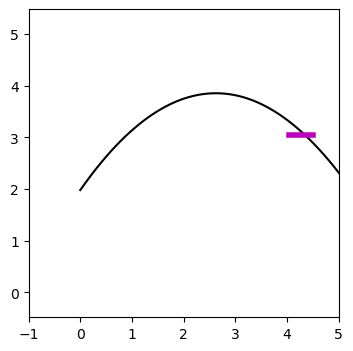

In [54]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(test_px,test_py,color='black')
ax.plot([basket_x-basket_diameter/2,basket_x+basket_diameter/2],[basket_y,basket_y],color='m',linewidth=4)
ax.axis('equal')
ax.set_xlim(-1,5)
ax.set_ylim(0,5)

## Question 2.1: Score?

A free throw is successful if the ball goes through the hoop. We will take a very simplified approach to determining this: we will consider the ball to have gone through the hoop if and only if its trajectory intersects with the interval of the rim.

The figure below illustrates the calculation. The trajectory of the ball is the red line and the rim of the basket is the purple interval. $k$ is the last time step for which the height of the ball is greater than 10 feet. We must find the point $x^*$ where the ball intersects the horizontal and determine whether $x^*$ falls within the purple interval:
\begin{equation*}
x^* \stackrel{?}{\in} \Bigl[x_{\text{basket}}- \frac{d_{\text{basket}}}{2},x_{\text{basket}}+ \frac{d_{\text{basket}}}{2}\Bigr]
\end{equation*}

<center><img src="resources/success.jpg" width=700></center>

By similarity of the two triangles in the picture we have:
\begin{equation*}
\frac{p_y[k]-y_{\text{basket}}}{x^*-p_x[k]} = 
\frac{y_{\text{basket}}-p_y[k\!+\!1]}{p_x[k\!+\!1]-x^*}
\end{equation*}

From here we get a formula for $x^*$:
\begin{equation*}
x^* = \frac{p_x[k\!+\!1](p_y[k]-y_{\text{basket}}) + p_x[k](y_{\text{basket}}-p_y[k\!+\!1])}{p_y[k]-p_y[k\!+\!1]}
\end{equation*}
Write a function called `success(px,py)` that carries out this computation and returns `True` if the free throw was successful and `False` otherwise. The input arguments `px` and `py` are the 1D NumPy arrays from part 2.3.

**Hints:**
+ Use [np.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to find $k$. Note that this function returns a tuple, whose first element is the array of indexes that satisfy the condition. Hence you have to index the result twice: first to obtain the array of indexes, and second to obtain the last value in the array. 
+ `basket_x`, `basket_y`, and `basket_diameter` are global constants.

In [55]:
def success(px,py):

    # Find k, the index of the last point in the trajectory where the ball is above the rim.
    indices_above_hoop = np.where(py > basket_y)
    k = indices_above_hoop[0][-1]

    # compute xstar
    xstar = ((px[k + 1] * (py[k] - basket_y)) + (px[k] * (basket_y - py[k+1]))) / (py[k] - py[k+1])

    # success if and only if xstar is in the interval
    success = True if xstar >= (basket_x - (basket_diameter/2)) and xstar <= (basket_x + (basket_diameter/2)) else False

    return success

In [56]:
# Check your code

# This should return True:
success(test_px,test_py)

True

In [57]:
grader.check("q2p1")

q2p1 results: All test cases passed!

## Question 2.2: Input samples

Now that we can generate a trajectory for a given initial condition, and evaluate whether the ball goes in the hoop, our next task is to create a "cloud" of initial conditions $(z^0_0,z^1_0,...,z^{N}_0)$ with which to perform Monte Carlo simulation. Each initial condition $z^i_0$ consists of randomly chosen values of $(p_{x0},p_{y0},v_{x0},v_{y0})$. However, again, instead of choosing $v_{x0}$ and $v_{y0}$ directly, we will compute them from a randomly chosen speed $v_0$ and angle $\theta_0$. 

Create four 1D NumPy arrays, each with length $N=150$, and containing randomly sampled values of $p_{x0}$, $p_{y0}$, $\theta_0$, and $v_0$ respectively. The parameters for the four sampling distributions are:

| Quantity | Array variable | Distribution | Mean | Standard deviation |
| --- | --- | --- | --- |--- | 
| $p_{x0}$ | `px0_arr` | Normal | 0 m |  3 cm | 
| $p_{y0}$ | `py0_arr` | Normal | 6.5 feet | 2 cm | 
| $\theta_0$| `theta0_arr` | Normal | $55^o$ |  0.03 radians | 
|$v_0$ | `v0_arr` | Normal | $7.4\:m/s$ | $0.1\:m/s$ | 

**Note**
+ Autograding with random numbers is delicate. It is important that the random number generator be initialized in every execution with the same seed. Please do not modify the `random_state` values passed to the `rvs` methods in the cell below. Here they are recorded in case you change them by accident: 

| variable | `random_state` |
| --- |--- | 
| `px0_arr` | 94582 |
| `py0_arr` | 98595 |
| `theta0_arr`| 23134 |
| `v0_arr` | 453456 |

In [58]:
N = 150
px0_arr    = stats.norm(loc=0, scale=0.03).rvs(size=N, random_state=94582)
py0_arr    = stats.norm(loc=6.5*ft2meter, scale=0.02).rvs(size=N, random_state=98595)
theta0_arr = stats.norm(loc=np.deg2rad(55), scale=0.03).rvs(size=N, random_state=23134)
v0_arr     = stats.norm(loc=7.4, scale=0.1).rvs(size=N, random_state=453456)

In [59]:
grader.check("q2p2")

q2p2 results: All test cases passed!

## Question 2.3: Monte Carlo simulation

Run a simulation for each of the 150 randomly sampled initial conditions. 

+ Each of the simulations is similar to the one from the example: simulation time `tf` is 2 seconds, and the trajectory should be evaluated on a grid with $K=100$ points. 
+ Evaluate `success(px,py)` on each of the 150 trajectories and store the results in a 1D NumPy array called `successes`.
+ Store the position values $p_x$ and $p_y$ of the simulated trajectories in a 3D NumPy array with shape (100,2,150) called `traj`. That is, the `px` array for the $i$'th run is stored as `traj[:,0,i]` and the corresponding `py` is stored as `traj[:,1,i]`

In [60]:
tf = 2     # seconds
K = 100    # time steps
t_eval = np.linspace(0, tf, K)  # evaluation grid

N = 150    # number of random initial conditions
 
successes = np.empty(150,dtype=bool)    # array of succes/no-success values
traj = np.empty((100,2,150))              # array to store px and py trajectories

# iterate through all initial conditions
for i in range(N):

    # initial condition
    px0 = px0_arr[i]
    py0 = py0_arr[i]
    theta0 = theta0_arr[i]
    v0 = v0_arr[i]

    # compute initial vx and vy
    vx0 = v0*np.cos(theta0)
    vy0 = v0*np.sin(theta0)

    # call solve_ivp
    sol = solve_ivp( fun=ball_flight_equation,       # the state equation
                     t_span=[0, tf],    # initial and final time
                     y0=(px0, py0, vx0, vy0),        # initial state
                     t_eval=t_eval)    # evaluation instants

    # Extract px and py from sol
    px = sol.y[0, :]
    py = sol.y[1, :]

    # Store px and py in traj
    traj[:, 0, i] = px; traj[:, 1, i] = py

    # Evaluate success
    indices_above_hoop = np.where(py > basket_y)
    k = indices_above_hoop[0][-1]
    xstar = ((px[k + 1] * (py[k] - basket_y)) + (px[k] * (basket_y - py[k+1]))) / (py[k] - py[k+1])
    successes[i] = True if xstar >= (basket_x - (basket_diameter/2)) and xstar <= (basket_x + (basket_diameter/2)) else False

(0.0, 5.0)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


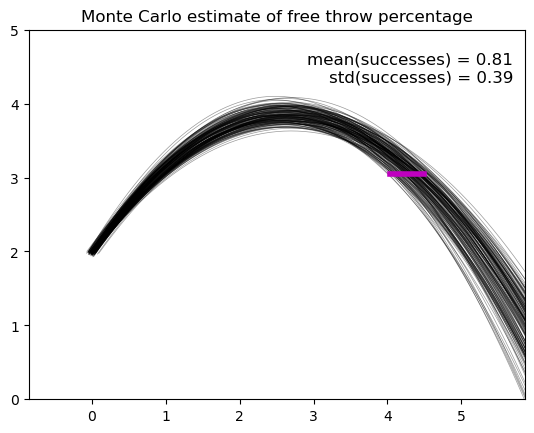

In [61]:
fig2, ax2 = plt.subplots()

for i in range(N):
    px = traj[:,0,i]
    py = traj[:,1,i]
    ax2.plot(px,py,'k',linewidth=0.5,alpha=0.4)

ax2.plot([basket_x-basket_diameter/2,basket_x+basket_diameter/2],[basket_y,basket_y],color='m',linewidth=4)
ax2.set_title(f'Monte Carlo estimate of free throw percentage')
ax2.text(5.7,4.3,f'mean(successes) = {np.mean(successes):.2f}\nstd(successes) = {np.std(successes):.2f}',fontsize=12,horizontalalignment='right')
ax2.axis('equal')
ax2.set_xlim(0,5)
ax2.set_ylim(0,5)

In [62]:
grader.check("q2p3")

q2p3 results: All test cases passed!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [63]:
grader.check_all()

q1p1 results: All test cases passed!

q1p2 results: All test cases passed!

q1p3 results: All test cases passed!

q2p1 results: All test cases passed!

q2p2 results: All test cases passed!

q2p3 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Make sure you submit the .zip file to Gradescope.

In [64]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)